In [1]:
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns 
df=sns.load_dataset("penguins")


In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


You import necessary libraries (numpy, pandas, seaborn).

Load the penguins dataset from seaborn.

df.head() displays the first 5 rows of the dataframe.

In [4]:
df.isnull

<bound method DataFrame.isnull of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  

In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Counts missing (NaN) values in each column.

Output shows that bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g have 2 missing values each, and sex has 11 missing values.

In [6]:
print(df.isnull().values.any())

True


Returns True since there are missing values in the dataset.

In [7]:
df1 = df.dropna()

In [8]:
df1.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
print(df1.isnull().values.any())

False


Drops all rows with any missing values.

Then you check again, and all missing values are gone (0 for all columns).

print() confirms no nulls remain.

In [10]:
df1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
df1.duplicated().sum()

np.int64(0)

Lists all columns.

Checks for duplicate rows; none found (0 duplicates).

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [14]:
le = LabelEncoder()

In [25]:
df1.loc[:, 'island'] = le.fit_transform(df1['island'])
df1.loc[:, 'sex'] = le.fit_transform(df1['sex'])
df1.loc[:, 'species'] = le.fit_transform(df1['species'])

Encode categorical text columns (island, sex, species) into numeric values using LabelEncoder.

This is necessary because ML models expect numbers, not strings.

In [16]:
x=df1.drop('species',axis=1)
x.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [17]:
y=df1['species']
y[:5]

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: object

x holds all features (input variables).

y is the target variable (species to predict).

In [18]:
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [19]:
df1['species'].value_counts()

species
0    146
2    119
1     68
Name: count, dtype: int64

In [20]:
df1['island'].value_counts()

island
0    163
1    123
2     47
Name: count, dtype: int64

In [21]:
df1['sex'].value_counts()

sex
1    168
0    165
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=55)

Split the data into training (75%) and testing (25%) sets.

random_state=55 ensures reproducibility.

Print shapes confirm sizes.

In [27]:
print(x.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(333, 6)
(249, 6)
(84, 6)
(249,)
(84,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=55),
    'Random Forest': RandomForestClassifier(random_state=55),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=55)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"---{name}---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Import various classification algorithms.

Import accuracy and classification report metrics.

Define models with some parameters (max_iter for Logistic Regression).

random_state for reproducibility.

For each model:

Train on training data.

Predict on test data.

Print accuracy and detailed classification report (precision, recall, f1-score for each class).



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [40]:
y_train = y_train.astype('int')
print(set(y_train))  # or np.unique(y_train)
print(y_train.dtype)
from sklearn.utils.multiclass import type_of_target

print("y_test:", type_of_target(y_test))
print("y_pred:", type_of_target(y_pred))


{0, 1, 2}
int64
y_test: multiclass
y_pred: multiclass


In [36]:
y_test = y_test.astype(int)

In [37]:
print("y_test:", type_of_target(y_test))

y_test: multiclass


In [38]:
log=LogisticRegression()
log.fit(X_train,y_train)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
y_pred=log.predict(X_test)
y_pred

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[31,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 35]])

In [43]:
cls = classification_report(y_test,y_pred)
print(cls)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        35

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


--- Decision Tree ---
Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      1.00      1.00        18
           2       1.00      0.97      0.99        35

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [47]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
rf_model.predict(X_test)

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


--- Random Forest ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        35

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [50]:
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
svm_model.predict(X_test_scaled)

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale data (SVM is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("--- Support Vector Machine (SVM) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


--- Support Vector Machine (SVM) ---
Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        35

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84



In [54]:
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [55]:
knn_model.predict(X_test_scaled)

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale data (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate
print("--- K-Nearest Neighbors (KNN) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


--- K-Nearest Neighbors (KNN) ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        35

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [57]:
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [58]:
nb_model.predict(X_test)

array([1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("--- Naive Bayes (GaussianNB) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


--- Naive Bayes (GaussianNB) ---
Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.89      0.94      0.92        18
           2       1.00      1.00      1.00        35

    accuracy                           0.96        84
   macro avg       0.95      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



In [61]:
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [62]:
gb_model.predict(X_test)

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("--- Gradient Boosting ---")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


--- Gradient Boosting ---
Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.97        18
           2       1.00      0.97      0.99        35

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [64]:
ada_model.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [65]:
ada_model.predict(X_test)

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Evaluate
print("--- AdaBoost Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))


--- AdaBoost Classifier ---
Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        35

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [66]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 2.4/56.8 MB 11.8 MB/s eta 0:00:05
   --- ------------------------------------ 4.7/56.8 MB 11.5 MB/s eta 0:00:05
   ----- ---------------------------------- 7.3/56.8 MB 11.6 MB/s eta 0:00:05
   ------ --------------------------------- 9.7/56.8 MB 11.5 MB/s eta 0:00:05
   -------- ------------------------------- 12.1/56.8 MB 11.6 MB/s eta 0:00:04
   ---------- ----------------------------- 14.4/56.8 MB 11.6 MB/s eta 0:00:04
   ----------- ---------------------------- 16.8/56.8 MB 11.5 MB/s eta 0:00:04
   ------------- -------------------------- 19.1/56.8 MB 11.5 MB/s eta 0:00:04
   --------------- ------------------------ 21.5/56.8 MB 11.5 MB/s eta 0:00:04
   ---------------- ----------------------- 23.9/56.8 MB 11.5 MB/s eta 0:00:03
   ------------------ --------------------- 26.5/56.8 MB 11.6 MB/s eta 0:00:03
   -------------------- ------------------- 28.8/56.8 MB 11.6 MB/


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
mlp_model.fit(X_train_scaled, y_train)


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [68]:
mlp_model.predict(X_test_scaled)

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate
print("--- Multi-layer Perceptron (MLP) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


--- Multi-layer Perceptron (MLP) ---
Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        35

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84



In [70]:
lda_model.fit(X_train, y_train)


,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [71]:
lda_model.predict(X_test)

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1])

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Train the model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predict
y_pred_lda = lda_model.predict(X_test)

# Evaluate
print("--- Linear Discriminant Analysis (LDA) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))


--- Linear Discriminant Analysis (LDA) ---
Accuracy: 0.9880952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        35

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84



In [73]:
qda_model.fit(X_train, y_train)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001


In [74]:
qda_model.predict(X_test)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: invalid value encountered in dot
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1055: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Train the model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Predict
y_pred_qda = qda_model.predict(X_test)

# Evaluate
print("--- Quadratic Discriminant Analysis (QDA) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Classification Report:\n", classification_report(y_test, y_pred_qda))


--- Quadratic Discriminant Analysis (QDA) ---
Accuracy: 0.21428571428571427
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.21      1.00      0.35        18
           2       0.00      0.00      0.00        35

    accuracy                           0.21        84
   macro avg       0.07      0.33      0.12        84
weighted avg       0.05      0.21      0.08        84



C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ADMIN\AppData\Local\Programs\

In [76]:
gpc_model.fit(X_train, y_train)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


,kernel,1**2 * RBF(length_scale=1)
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,0
,max_iter_predict,100
,warm_start,False
,copy_X_train,True
,random_state,42
,multi_class,'one_vs_rest'
,n_jobs,None
,kernel__k1,1**2
,kernel__k2,RBF(length_scale=1)


In [77]:
gpc_model.predict(X_test)


array([2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0])

In [75]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report

# Define the kernel
kernel = 1.0 * RBF(length_scale=1.0)

# Train the model
gpc_model = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc_model.fit(X_train, y_train)

# Predict
y_pred_gpc = gpc_model.predict(X_test)

# Evaluate
print("--- Gaussian Process Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_gpc))
print("Classification Report:\n", classification_report(y_test, y_pred_gpc))


C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


--- Gaussian Process Classifier ---
Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       1.00      0.83      0.91        18
           2       0.95      1.00      0.97        35

    accuracy                           0.95        84
   macro avg       0.96      0.93      0.94        84
weighted avg       0.95      0.95      0.95        84



C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


AUC: 0.96


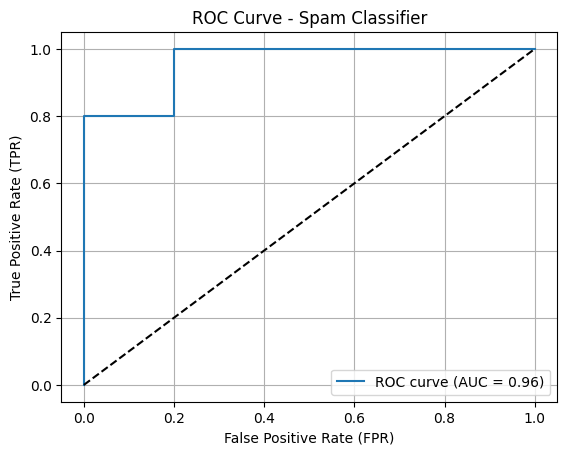

In [78]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example: True labels (1 = Spam, 0 = Not Spam)
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

# Example: Predicted probabilities of being spam from a model
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.9, 0.05, 0.7, 0.3, 0.6])

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate Area Under Curve (AUC)
auc = roc_auc_score(y_true, y_scores)

# Print AUC
print(f"AUC: {auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Spam Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()
